## BUSINESS UNDERSTANDING ##

**INTRODUCTION**

The real estate market is a complex and dynamic industry, heavily influenced by numerous factors ranging from location and property characteristics to economic conditions. Accurately predicting property prices is crucial for various stakeholders, including buyers, sellers, investors, and financial institutions. Leveraging historical data and machine learning techniques, we aim to build a predictive model to estimate property prices.

**PROBLEM STATEMENT**

In the competitive real estate market, stakeholders require accurate price predictions to make informed decisions. Currently, there is a lack of a robust and reliable model that can predict property prices based on historical data and property characteristics. The existing manual or heuristic methods are often inaccurate and time-consuming.

**OBJECTIVES**

**1. Develop a Predictive Model**: Build a linear regression model to predict property prices using historical data and property characteristics.

**2. Understand Key Features**: Identify and analyze the key features that significantly impact property prices.

**3. Improve Decision Making**: Provide stakeholders with a reliable tool to estimate property prices, enhancing their decision-making process.

**4. Evaluate Model Performance**: Assess the model's accuracy and performance using appropriate evaluation metrics.

## DATA UNDERSTANDING ##

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the Data

In [3]:
df = pd.read_csv("kc_house_data.csv")

Data Inspection

In [5]:
#inspecting the size of the dataset
print(df.shape)

(21597, 21)


The dataset has 21,597 rows and 21 columns

In [6]:
#inspecting first five rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#inspecting last five rows
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


From inspecting the first five and last five rows we can already see columns with NaN values that is the waterfront and the yr_renovated columns. We take note to handle the issing values during data cleaning.

In [8]:
#checking for detailed information about the columns, including their data types and the count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From above info we get the following information:

There are a total of 21,597 entries (rows).

The dataset includes 21 columns.

Columns such as id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, yr_built, zipcode, lat, long, sqft_living15, and sqft_lot15 have no missing values.

Columns like waterfront, view, and yr_renovated have missing values.

The date column is of type object and needs to be converted to datetime format.

The sqft_basement column is of type object and should be converted to a numeric type.

In [9]:
# Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
# Checking for missing values and their percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

              Missing Values  Percentage
waterfront              2376   11.001528
view                      63    0.291707
yr_renovated            3842   17.789508


We identified the columns with missing values and their respective percentages to understand the extent of missing data in our dataset. The results are as follows:

| Column       | Missing Values | Percentage |
|--------------|----------------|------------|
| waterfront   | 2376           | 11.00%     |
| view         | 63             | 0.29%      |
| yr_renovated | 3842           | 17.79%     |

**Comments:**
- **waterfront**: Approximately 11% of the entries have missing values in the `waterfront` column. This could be due to the fact that not all properties are near water bodies.
- **view**: Only 0.29% of the entries have missing values in the `view` column, which is relatively low and might not significantly impact the analysis.
- **yr_renovated**: Around 17.79% of the entries have missing values in the `yr_renovated` column. This indicates that a considerable number of properties have not been renovated or the renovation year was not recorded.

These missing values will need to be addressed during the data preprocessing stage to ensure the accuracy of our predictive model.


In [14]:
#checking for duplicates in our dataset
df.duplicated().sum()



0

We have no duplicates in our dataset as per the output above.

In [15]:
# Summary statistics for numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We got the summary statistics for numerical columns to understand the distribution and key characteristics of our dataset. below are some of the key observations:

- **Price**: The average house price is approximately $540,297, with prices ranging from $78,000(min value) to $7,700,000(max value).
- **Bedrooms**: Houses typically have between 1 to 33 bedrooms, with an average of about 3.37 bedrooms.
- **Bathrooms**: The average number of bathrooms is around 2.12, with homes having between 0.5 to 8 bathrooms.
- **Sqft Living**: The average living area is approximately 2,080 square feet, ranging from 370 to 13,540 square feet.
- **Sqft Lot**: The average lot size is about 15,094 square feet, with sizes ranging widely from 520 to 1,651,359 square feet.
- **Year Built and Year Renovated**: Houses were built between 1900 and 2015, with renovation years spanning the same period.




In [23]:
#checking for unique values for the waterfront and view column which indicated there had missing values. 
# This will guide us on how to impute the values later.
waterfront = df['waterfront'].unique()
view = df['view'].unique()
print("WaterFront unique", waterfront)
print("View unique", view)


WaterFront unique [0. 1.]
View unique [0. 3. 4. 2. 1.]


We see that waterfront has values of 0 and 1 as the main values, which would mean a house can has a waterfront or does not have one.
For the view, we see 0, 1,2,3, and 4 as the values showing how many times the house has been viewed. 

## DATA PREPROCESSING ##

**Handling Missing values**

We took below steps to handle missing values found in the waterfront, view and yr_renovated column:

Waterfront: Since it is a categorical variable indicating whether the property has a waterfront view or not, we can impute these missing values with the mode (most frequent value) of the column.

view: This column represents the number of times the property has been viewed. Similar to waterfront, we can impute missing values with the mode.

yr_renovated: The yr_renovated column indicates the year when the property was renovated. Missing values here likely mean the property was never renovated. We can replace these missing values with 0 (assuming no renovation).

In [18]:
# Replace missing values in 'waterfront' with the mode
waterfront_values = df['waterfront'].mode()[0]
df['waterfront'].fillna(waterfront_values, inplace=True)

In [19]:
# Replace missing values in 'view' with the mode
view_values = df['view'].mode()[0]
df['view'].fillna(view_values, inplace=True)


In [20]:
# Replace missing values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

In [21]:
# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


We can see no more missing values. We can go forth with data type convertion

**Data Type Transformation**

We handle the date column which is represented as on object by converting it to a date format.

We tranform the sqft_basement column by converting from object to numerical

In [24]:
# Converting date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Converting sqft_basement to numeric, coercing errors to NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')


In [25]:
#validating the transformation
date_trans = df['date'].dtype
sqftB_trans = df['sqft_basement'].dtype
print('Date new datatype',date_trans)
print('sqft basement new datatype',sqftB_trans )

Date new datatype datetime64[ns]
sqft basement new datatype float64


from above output we confirm the data type conversion is done.

**Handling Outliers**

We first identify outliers in our major columns that is 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors' using the Interquartile Range (IQR) and visualization using box plots. Then we proceed to handling them.

In [26]:
import pandas as pd

# Define the columns you want to check for outliers
major_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

# Calculate IQR for each column
Q1 = df[major_columns].quantile(0.25)
Q3 = df[major_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((df[major_columns] < (Q1 - 1.5 * IQR)) | (df[major_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print number of outliers
print("Number of outliers detected:")
print(outliers.sum())


Number of outliers detected:
3895


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


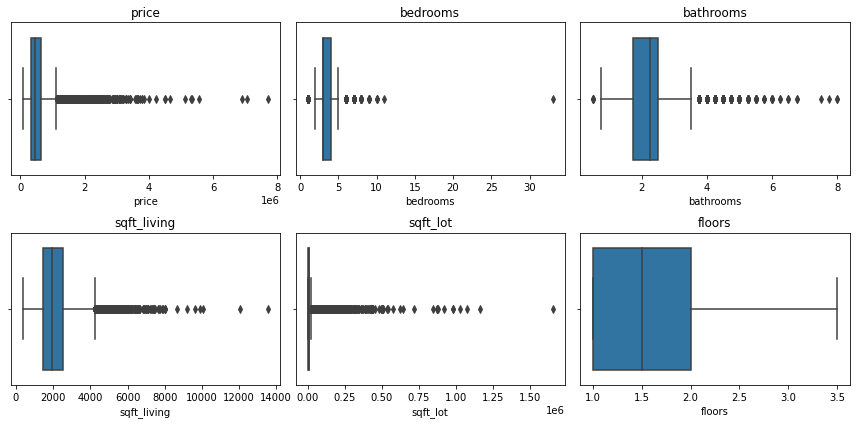

In [28]:
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create box plots for each column using Seaborn
for i, col in enumerate(major_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


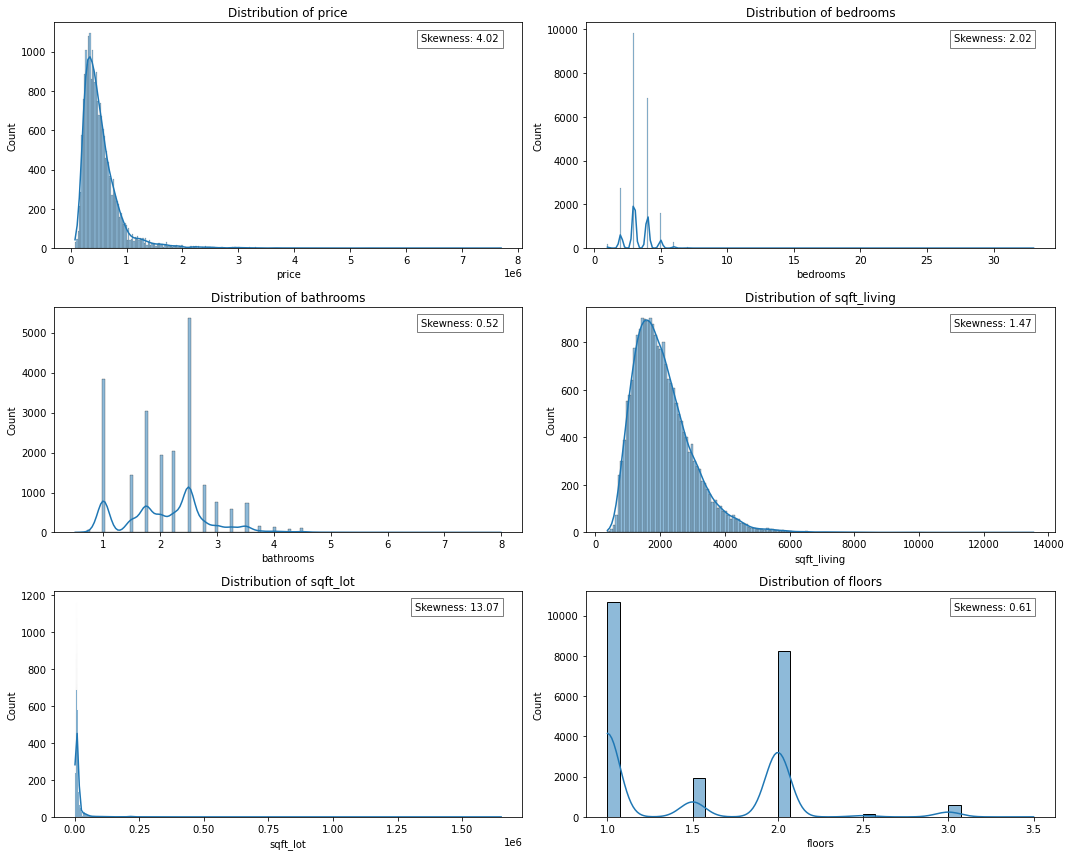

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, columns, n_cols=2, figsize=(15, 4)):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add skewness value to the plot
        skewness = df[column].skew()
        ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
plot_distributions(df, columns_to_plot)

The visualization above shows the varying degrees of skewness across features:

Price: Highly right-skewed (skewness 4.02), with most properties clustered at lower prices and a long tail of high-value outliers.

Bedrooms: Moderately right-skewed (2.02), with peaks at 3-4 bedrooms and some outliers with many rooms.

Bathrooms: Slightly right-skewed (0.52), showing a more normal distribution with discrete values.

Sqft_living: Moderately right-skewed (1.47), indicating some larger homes as outliers.

Sqft_lot: Extremely right-skewed (13.07), suggesting a few properties with very large lots.

Floors: Slightly right-skewed (0.61), with most homes having 1-2 floors and fewer with 3 or more.

**REMOVING OUTLIERS AND NORMALIZATION**

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def handle_outliers(df, columns, method='iqr', threshold=1.5):
    df_cleaned = df.copy()
    
    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        
        elif method == 'percentile':
            lower_bound = df[column].quantile(0.01)
            upper_bound = df[column].quantile(0.99)
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
    
    return df_cleaned


In [31]:
def normalize_data(df, columns, method='log'):
    df_normalized = df.copy()
    
    for column in columns:
        if method == 'log':
            # Add a small constant to avoid log(0)
            df_normalized[f'{column}_normalized'] = np.log1p(df_normalized[column])
        elif method == 'standard':
            scaler = StandardScaler()
            df_normalized[f'{column}_normalized'] = scaler.fit_transform(df_normalized[[column]])
    
    return df_normalized

In [32]:
# Columns to process
continuous_columns = ['price', 'sqft_living', 'sqft_lot']
discrete_columns = ['bedrooms', 'bathrooms', 'floors']

# Handle outliers
df_cleaned = handle_outliers(df, continuous_columns, method='iqr', threshold=1.5)
df_cleaned = handle_outliers(df_cleaned, discrete_columns, method='percentile')

# Normalize data
df_normalized = normalize_data(df_cleaned, continuous_columns, method='log')
df_normalized = normalize_data(df_normalized, discrete_columns, method='standard')




price:
Original:
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Cleaned:
count    2.159700e+04
mean     5.117047e+05
std      2.499734e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129500e+06
Name: price, dtype: float64

Normalized:
count    21597.000000
mean        13.030264
std          0.483979
min         11.264477
25%         12.682310
50%         13.017005
75%         13.377007
max         13.937287
Name: price_normalized, dtype: float64

sqft_living:
Original:
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Cleaned:
count    21597.000000
mean      2058.392184
std        838.660736
min        370.000000
25% 

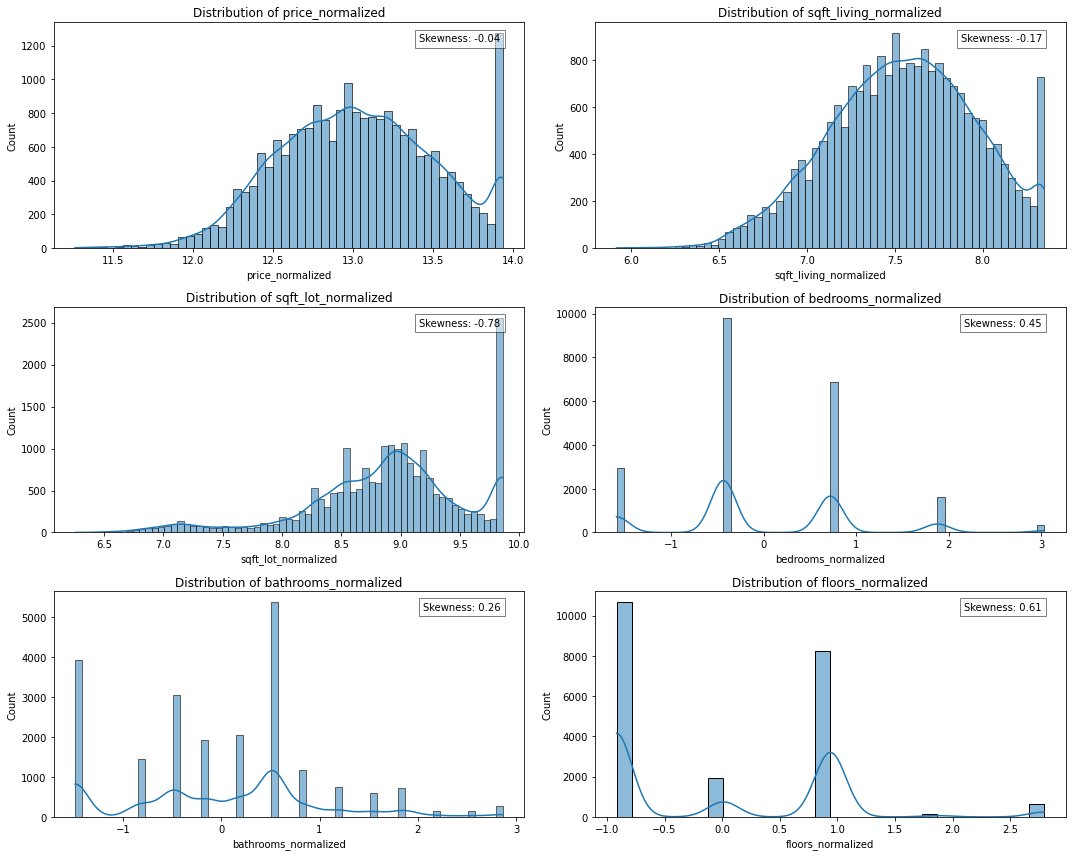

In [33]:
# Print summary statistics
for column in continuous_columns + discrete_columns:
    print(f"\n{column}:")
    print("Original:")
    print(df[column].describe())
    print("\nCleaned:")
    print(df_cleaned[column].describe())
    print("\nNormalized:")
    print(df_normalized[f'{column}_normalized'].describe())

# Optionally, plot the distributions of the normalized data
plot_distributions(df_normalized, [f'{col}_normalized' for col in continuous_columns + discrete_columns])

The normalization process has successfully reduced extreme skewness, particularly in continuous variables, making the data more suitable for various statistical analyses and machine learning algorithms. The discrete variables, while normalized, still maintain their fundamental distribution patterns, which is expected and appropriate for these features.

## FEATURE ENGINEERING ##

We go ahead and generate new variables that will aid in our modeling and analytical process, We will generate a new variable that take a boolean value showing whether a house was renovated or not so even if we drop the year renovated column we can still borrow some imapct from it.

In [38]:
df_normalized.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_normalized',
       'sqft_living_normalized', 'sqft_lot_normalized', 'bedrooms_normalized',
       'bathrooms_normalized', 'floors_normalized'],
      dtype='object')

In [39]:
# Create a binary indicator for house renovation
df_normalized['house_renovated'] = df_normalized['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Display the first few rows to verify
print(df_normalized[['yr_renovated', 'house_renovated']].head())

   yr_renovated  house_renovated
0           0.0                0
1        1991.0                1
2           0.0                0
3           0.0                0
4           0.0                0


## FEATURE SELECTION ##

**Correlation Analysis**

In [40]:
# Example: Calculate correlations between features
corr_matrix = df_normalized.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,price_normalized,sqft_living_normalized,sqft_lot_normalized,bedrooms_normalized,bathrooms_normalized,floors_normalized,house_renovated
id,1.000000,-0.011458,0.001000,0.006717,-0.009740,-0.133416,0.018794,-0.003599,0.011772,-0.023803,...,0.020672,-0.002701,-0.138557,0.001190,-0.000387,-0.103590,0.001000,0.006717,0.018794,-0.010621
price,-0.011458,1.000000,0.349404,0.535900,0.700896,0.172587,0.298899,0.152084,0.354411,0.041268,...,0.046156,0.629811,0.092862,0.962124,0.658700,0.133494,0.349404,0.535900,0.298899,0.112763
bedrooms,0.001000,0.349404,1.000000,0.525341,0.612825,0.193664,0.182310,0.000026,0.083809,0.022701,...,0.140677,0.412398,0.034265,0.346903,0.637280,0.246068,1.000000,0.525341,0.182310,0.018160
bathrooms,0.006717,0.535900,0.525341,1.000000,0.752441,0.120125,0.510313,0.059247,0.180505,-0.127512,...,0.229159,0.571569,0.083345,0.532325,0.757285,0.063996,0.525341,1.000000,0.510313,0.045005
sqft_living,-0.009740,0.700896,0.612825,0.752441,1.000000,0.349504,0.364311,0.085831,0.264534,-0.059788,...,0.252748,0.762901,0.172111,0.673781,0.969964,0.342329,0.612825,0.752441,0.364311,0.050055
sqft_lot,-0.133416,0.172587,0.193664,0.120125,0.349504,1.000000,-0.191757,0.101445,0.143878,0.067624,...,0.351901,0.392534,0.480751,0.139222,0.325324,0.916050,0.193664,0.120125,-0.191757,0.018745
floors,0.018794,0.298899,0.182310,0.510313,0.364311,-0.191757,1.000000,0.020842,0.028421,-0.264277,...,0.126319,0.280451,-0.010617,0.313262,0.367636,-0.335643,0.182310,0.510313,1.000000,0.003773
waterfront,-0.003599,0.152084,0.000026,0.059247,0.085831,0.101445,0.020842,1.000000,0.380543,0.016648,...,-0.037628,0.083823,0.030658,0.120836,0.070078,0.080330,0.000026,0.059247,0.020842,0.074267
view,0.011772,0.354411,0.083809,0.180505,0.264534,0.143878,0.028421,0.380543,1.000000,0.045622,...,-0.077702,0.278928,0.073083,0.306931,0.234044,0.125948,0.083809,0.180505,0.028421,0.090480
condition,-0.023803,0.041268,0.022701,-0.127512,-0.059788,0.067624,-0.264277,0.016648,0.045622,1.000000,...,-0.105877,-0.093072,-0.003126,0.038245,-0.048768,0.113875,0.022701,-0.127512,-0.264277,-0.055383


In [41]:
df_normalized.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_normalized',
       'sqft_living_normalized', 'sqft_lot_normalized', 'bedrooms_normalized',
       'bathrooms_normalized', 'floors_normalized', 'house_renovated'],
      dtype='object')

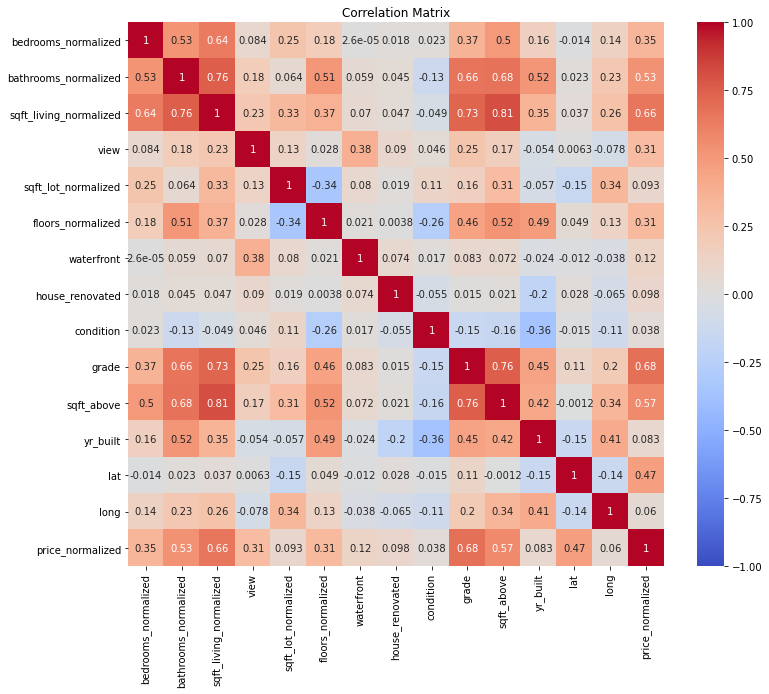

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your dataset with features and price
features = ['bedrooms_normalized', 'bathrooms_normalized', 'sqft_living_normalized','view', 'sqft_lot_normalized', 'floors_normalized', 
            'waterfront', 'house_renovated', 'condition', 'grade', 'sqft_above', 
            'yr_built', 'lat', 'long', 'price_normalized']

# Selecting the columns of interest
df_selected = df_normalized[features]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


We choose featrures whose 

In [104]:
features = ['bedrooms_normalized', 'bathrooms_normalized', 'sqft_living_normalized','view', 'floors_normalized','grade', 'sqft_above', 'yr_built',
           'lat']

In [100]:
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical features
numerical_features = ['bedrooms_normalized', 'bathrooms_normalized', 'sqft_living_normalized', 'view' ,
                      'floors_normalized', 'sqft_above', 'yr_built', 'lat', 'long']
categorical_features = ['grade', 'condition']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df_normalized[categorical_features])
encoded_feature_names = encoder.get_feature_names(categorical_features)

# Create a new dataframe with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_normalized.index)

# Combine numerical and encoded features
final_df = pd.concat([df_normalized[numerical_features], encoded_df], axis=1)

# Add the target variable (price) to the final dataframe
final_df['price'] = df_normalized['price_normalized']



In [101]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

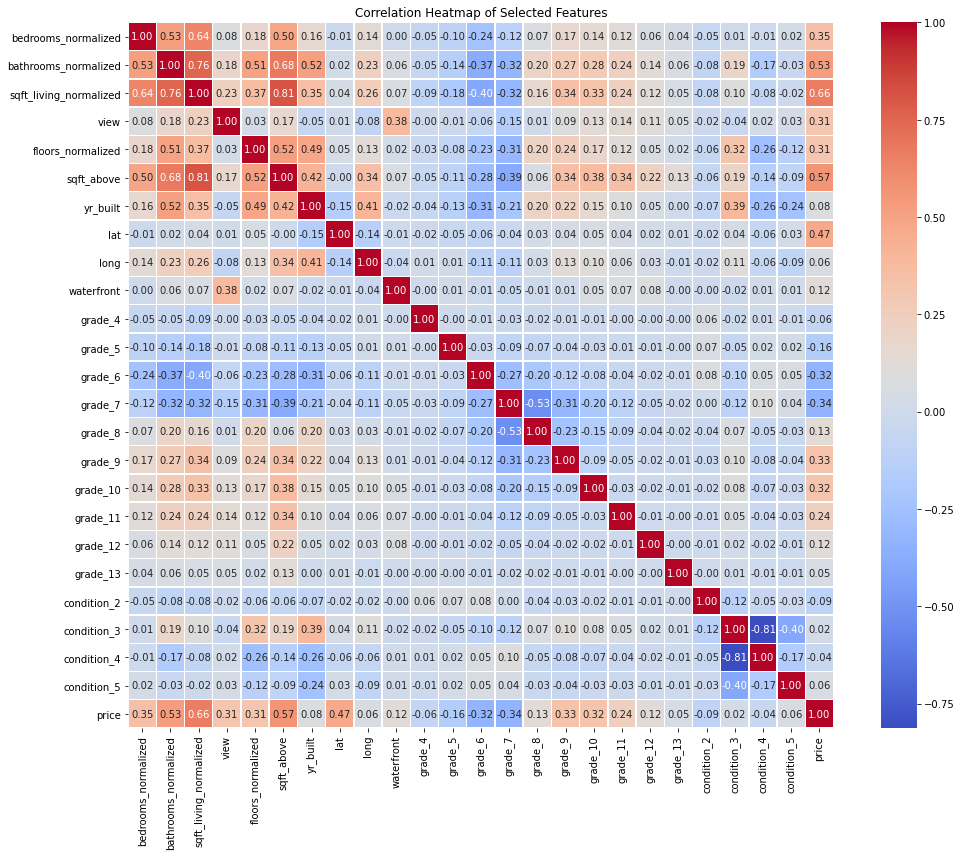

Correlation with Price:
price                     1.000000
sqft_living_normalized    0.660524
sqft_above                0.571111
bathrooms_normalized      0.532325
lat                       0.472815
bedrooms_normalized       0.346903
grade_9                   0.330308
grade_10                  0.324235
floors_normalized         0.313262
view                      0.306931
grade_11                  0.237033
grade_8                   0.131849
waterfront                0.120836
grade_12                  0.119438
yr_built                  0.082978
condition_5               0.059933
long                      0.059518
grade_13                  0.045995
condition_3               0.024710
condition_4              -0.041809
grade_4                  -0.063607
condition_2              -0.091317
grade_5                  -0.155496
grade_6                  -0.324480
grade_7                  -0.337858
Name: price, dtype: float64


In [102]:
# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

# Print the correlation with the target variable (price)
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:")
print(price_correlation)

## MODELING ##

Importing modeling libraries

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [96]:
# Separate the target variable
X = final_df.drop('price', axis=1)
y = final_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [98]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.059524828685687176
R^2 Score: 0.7439950480319222


MSE: 0.059524828685687176 suggests that the predictions are reasonably close to the actual values on average, considering the data is normalized.

R^2 Score: 0.7439950480319222 indicates a strong relationship between the features and the target variable, with the model explaining about 74.39% of the variance in house prices.

## VISUALIZATIONS ##

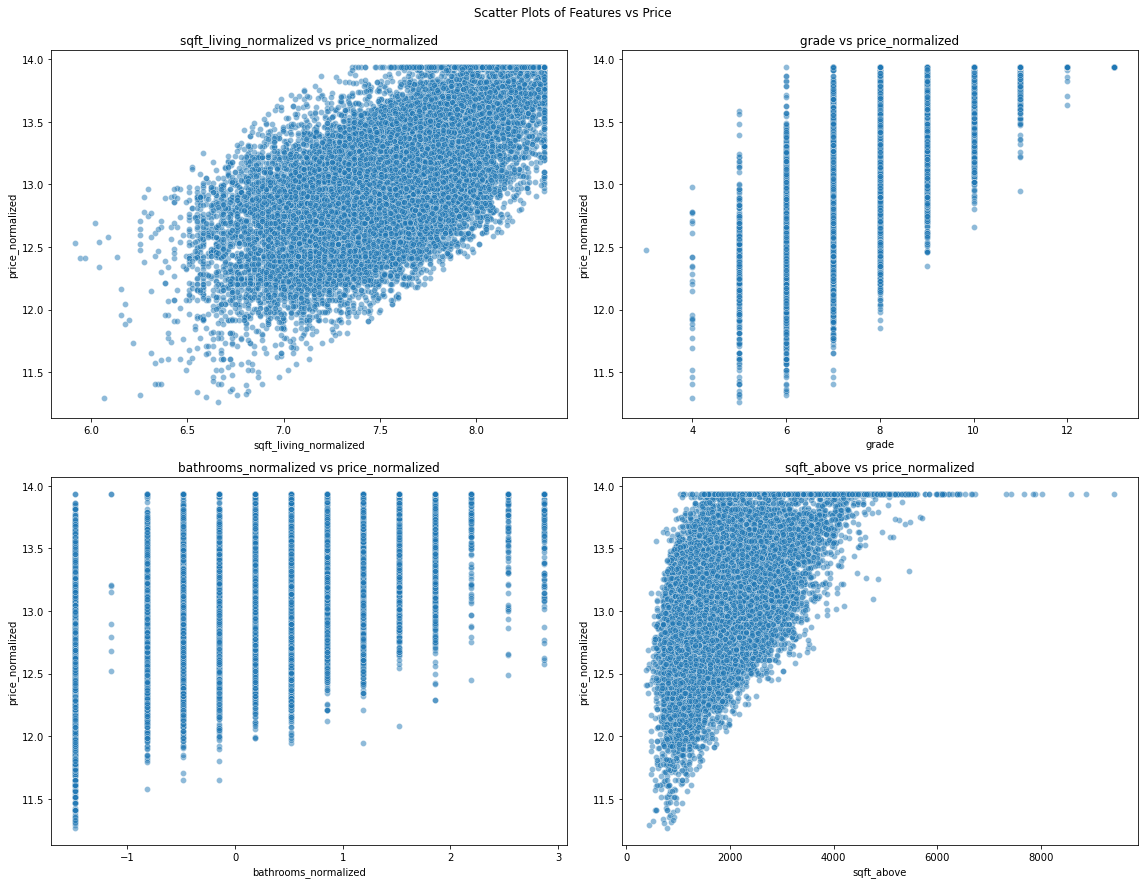

In [105]:
import seaborn as sns

# Assuming df_normalized is your DataFrame with all necessary columns and has been preprocessed

# Define the features and target variable
features = ['sqft_living_normalized', 'grade', 'bathrooms_normalized', 'sqft_above']
target = 'price_normalized'

# Create scatter plots
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_normalized[feature], y=df_normalized[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.suptitle('Scatter Plots of Features vs Price', y=1.02)
plt.show()


## CONCLUSION ##


**1. Develop a Predictive Model:**
   - **Objective**: Build a linear regression model to predict property prices using historical data and property characteristics.
   - **Conclusion**: The linear regression model was successfully developed to predict property prices. The model’s performance metrics indicate that it is a reliable tool for estimating property prices. The Mean Squared Error (MSE) of 0.0595 suggests that the model's predictions are reasonably close to the actual values on average, considering the data is normalized.

**2. Understand Key Features:**
   - **Objective**: Identify and analyze the key features that significantly impact property prices.
   - **Conclusion**: Through feature selection and one-hot encoding, the model includes various numerical and categorical features such as `bedrooms_normalized`, `bathrooms_normalized`, `sqft_living_normalized`, `view`, `floors_normalized`, `sqft_above`, `yr_built`, `lat`, `long`, `grade`, and `condition`. The high R^2 score (0.744) indicates that these features collectively explain approximately 74.39% of the variance in house prices, underscoring their significant impact.

**3. Improve Decision Making:**
   - **Objective**: Provide stakeholders with a reliable tool to estimate property prices, enhancing their decision-making process.
   - **Conclusion**: The model’s high R^2 score and low MSE indicate that it is a reliable and accurate tool for estimating property prices. Stakeholders can use this model to make informed decisions about property investments, pricing strategies, and market analysis. The model's ability to explain a substantial portion of the variance in house prices provides stakeholders with confidence in its predictive power.

**4. Evaluate Model Performance:**
   - **Objective**: Assess the model's accuracy and performance using appropriate evaluation metrics.
   - **Conclusion**: The model was evaluated using Mean Squared Error (MSE) and R^2 score. The MSE of 0.0595 indicates that the predictions are reasonably close to the actual values, while the R^2 score of 0.744 suggests that the model explains about 74.39% of the variance in house prices. These metrics demonstrate that the model performs well and meets the objective of accurately predicting property prices.

### Summary
The linear regression model developed for predicting property prices performs well, as evidenced by the MSE of 0.0595 and R^2 score of 0.744. The model effectively identifies and leverages key features that impact property prices, providing a reliable tool for stakeholders to make informed decisions. The performance metrics validate the model’s accuracy, making it a valuable asset for property price estimation and strategic decision-making.
